In [1]:
import time

import pandas as pd
import torch
from tqdm import trange, tqdm

from src.data import batch_dataset, load_data, split_data
from src.lstm import evaluate_hparams
from src.data import time_series_split
from src.lstm import MCDLSTM, train_mcdlstm
from torch.utils.data import TensorDataset, DataLoader

import numpy as np
from sklearn.model_selection import ParameterGrid

from matplotlib import pyplot as plt

df = load_data()
dataset = split_data(
    df,
    without_cols=[
        "Timestamp",
        "Light1",
        "Light2",
        "Light3",
        "Light4",
    ],
    scale="normalize",
)
seq_dataset = batch_dataset(dataset, sequence_length=10, overlap_series=True)

(x_train, y_train), (x_test, y_test) = dataset
(seq_x_train, seq_y_train), (seq_x_test, seq_y_test) = seq_dataset

## Z regresją, wstępne trenowanie

  1%|          | 1/100 [00:11<19:00, 11.52s/it]

Epoch 1
Train loss : 0.9178144729479029, dev loss : 2.0218371133650503
Dev MSE (rounded outs) : 2.128, R2: -0.320, f1: 0.277


  2%|▏         | 2/100 [00:22<18:06, 11.09s/it]

Epoch 2
Train loss : 0.8520655666768786, dev loss : 1.8842690644725677
Dev MSE (rounded outs) : 2.128, R2: -0.230, f1: 0.277


  3%|▎         | 3/100 [00:32<17:37, 10.90s/it]

Epoch 3
Train loss : 0.7646032710202598, dev loss : 1.671888614854505
Dev MSE (rounded outs) : 2.128, R2: -0.092, f1: 0.277


  4%|▍         | 4/100 [00:44<17:41, 11.06s/it]

Epoch 4
Train loss : 0.6468441141217123, dev loss : 1.4442280646293395
Dev MSE (rounded outs) : 1.432, R2: 0.057, f1: 0.186


  5%|▌         | 5/100 [00:54<17:13, 10.88s/it]

Epoch 5
Train loss : 0.5098170295887785, dev loss : 1.3225765958909066
Dev MSE (rounded outs) : 1.384, R2: 0.136, f1: 0.185


  6%|▌         | 6/100 [01:04<16:32, 10.56s/it]

Epoch 6
Train loss : 0.438032632494868, dev loss : 1.2815303437171444
Dev MSE (rounded outs) : 1.347, R2: 0.163, f1: 0.385


  7%|▋         | 7/100 [01:14<16:02, 10.35s/it]

Epoch 7
Train loss : 0.4132781116210896, dev loss : 1.261792400190907
Dev MSE (rounded outs) : 1.261, R2: 0.176, f1: 0.371


  8%|▊         | 8/100 [01:24<15:42, 10.24s/it]

Epoch 8
Train loss : 0.3884510839203365, dev loss : 1.2379179789173989
Dev MSE (rounded outs) : 1.249, R2: 0.192, f1: 0.370


  9%|▉         | 9/100 [01:35<15:46, 10.40s/it]

Epoch 9
Train loss : 0.37733860964713833, dev loss : 1.2148709931681234
Dev MSE (rounded outs) : 1.219, R2: 0.207, f1: 0.355


 10%|█         | 10/100 [01:45<15:35, 10.40s/it]

Epoch 10
Train loss : 0.374224361959889, dev loss : 1.1949573639900453
Dev MSE (rounded outs) : 1.203, R2: 0.220, f1: 0.359


 11%|█         | 11/100 [01:56<15:28, 10.44s/it]

Epoch 11
Train loss : 0.3537221209922798, dev loss : 1.170002531620764
Dev MSE (rounded outs) : 1.182, R2: 0.236, f1: 0.361


 12%|█▏        | 12/100 [02:06<15:14, 10.39s/it]

Epoch 12
Train loss : 0.34455061480108456, dev loss : 1.1624767645712821
Dev MSE (rounded outs) : 1.183, R2: 0.241, f1: 0.362


 13%|█▎        | 13/100 [02:17<15:18, 10.56s/it]

Epoch 13
Train loss : 0.3385137340179074, dev loss : 1.1279953795094644
Dev MSE (rounded outs) : 1.180, R2: 0.264, f1: 0.358


 14%|█▍        | 14/100 [02:28<15:06, 10.54s/it]

Epoch 14
Train loss : 0.3226543155171183, dev loss : 1.1086865663528442
Dev MSE (rounded outs) : 1.167, R2: 0.276, f1: 0.357


 15%|█▌        | 15/100 [02:39<15:29, 10.93s/it]

Epoch 15
Train loss : 0.31334293851621536, dev loss : 1.0739748535617706
Dev MSE (rounded outs) : 1.156, R2: 0.299, f1: 0.361


 16%|█▌        | 16/100 [02:51<15:38, 11.18s/it]

Epoch 16
Train loss : 0.3034023808190238, dev loss : 1.0500707395615116
Dev MSE (rounded outs) : 1.154, R2: 0.314, f1: 0.361


 17%|█▋        | 17/100 [03:02<15:09, 10.95s/it]

Epoch 17
Train loss : 0.3023511243122722, dev loss : 1.0290376957385772
Dev MSE (rounded outs) : 1.138, R2: 0.328, f1: 0.360


 18%|█▊        | 18/100 [03:12<14:41, 10.75s/it]

Epoch 18
Train loss : 0.27721624023358343, dev loss : 1.0042103298248783
Dev MSE (rounded outs) : 1.112, R2: 0.344, f1: 0.362


 19%|█▉        | 19/100 [03:22<14:16, 10.57s/it]

Epoch 19
Train loss : 0.2757070634160706, dev loss : 0.9569114475480972
Dev MSE (rounded outs) : 1.078, R2: 0.375, f1: 0.361


 20%|██        | 20/100 [03:32<13:55, 10.44s/it]

Epoch 20
Train loss : 0.2555211931319812, dev loss : 0.9227393990562808
Dev MSE (rounded outs) : 1.035, R2: 0.398, f1: 0.357


 21%|██        | 21/100 [03:44<14:14, 10.82s/it]

Epoch 21
Train loss : 0.25461944992186525, dev loss : 0.8880611302391175
Dev MSE (rounded outs) : 1.012, R2: 0.420, f1: 0.354


 22%|██▏       | 22/100 [03:54<13:45, 10.59s/it]

Epoch 22
Train loss : 0.24775865382474402, dev loss : 0.8741208055327016
Dev MSE (rounded outs) : 1.009, R2: 0.429, f1: 0.351


 23%|██▎       | 23/100 [04:04<13:22, 10.42s/it]

Epoch 23
Train loss : 0.23974123445483064, dev loss : 0.8289835130976092
Dev MSE (rounded outs) : 0.931, R2: 0.459, f1: 0.367


 24%|██▍       | 24/100 [04:14<13:04, 10.33s/it]

Epoch 24
Train loss : 0.22483068494413327, dev loss : 0.8080597620817923
Dev MSE (rounded outs) : 0.903, R2: 0.472, f1: 0.368


 25%|██▌       | 25/100 [04:25<12:59, 10.39s/it]

Epoch 25
Train loss : 0.21650627895954097, dev loss : 0.7624625813576483
Dev MSE (rounded outs) : 0.908, R2: 0.502, f1: 0.370


 26%|██▌       | 26/100 [04:38<13:56, 11.30s/it]

Epoch 26
Train loss : 0.2143115064813921, dev loss : 0.7218198247494236
Dev MSE (rounded outs) : 0.887, R2: 0.529, f1: 0.382


 27%|██▋       | 27/100 [04:50<13:59, 11.50s/it]

Epoch 27
Train loss : 0.2051995361643464, dev loss : 0.7131225226386901
Dev MSE (rounded outs) : 0.868, R2: 0.534, f1: 0.393


 28%|██▊       | 28/100 [05:03<14:16, 11.90s/it]

Epoch 28
Train loss : 0.19618901794430296, dev loss : 0.6729431065820879
Dev MSE (rounded outs) : 0.748, R2: 0.561, f1: 0.406


 29%|██▉       | 29/100 [05:16<14:28, 12.24s/it]

Epoch 29
Train loss : 0.20293800076359345, dev loss : 0.6578773904231286
Dev MSE (rounded outs) : 0.727, R2: 0.570, f1: 0.402


 30%|███       | 30/100 [05:28<14:21, 12.30s/it]

Epoch 30
Train loss : 0.1958277503308277, dev loss : 0.6346147973691264
Dev MSE (rounded outs) : 0.692, R2: 0.586, f1: 0.406


 31%|███       | 31/100 [05:41<14:18, 12.45s/it]

Epoch 31
Train loss : 0.18498958072076616, dev loss : 0.6073032103238567
Dev MSE (rounded outs) : 0.640, R2: 0.603, f1: 0.425


 32%|███▏      | 32/100 [05:51<13:20, 11.77s/it]

Epoch 32
Train loss : 0.17566926215624384, dev loss : 0.5791609734296799
Dev MSE (rounded outs) : 0.624, R2: 0.622, f1: 0.442


 33%|███▎      | 33/100 [06:02<12:51, 11.52s/it]

Epoch 33
Train loss : 0.1815408856236181, dev loss : 0.5665003815966267
Dev MSE (rounded outs) : 0.596, R2: 0.630, f1: 0.426


 34%|███▍      | 34/100 [06:12<12:12, 11.09s/it]

Epoch 34
Train loss : 0.17748217207375958, dev loss : 0.5454301204412214
Dev MSE (rounded outs) : 0.572, R2: 0.644, f1: 0.458


 35%|███▌      | 35/100 [06:22<11:41, 10.79s/it]

Epoch 35
Train loss : 0.17376441302020912, dev loss : 0.5494757955593448
Dev MSE (rounded outs) : 0.574, R2: 0.641, f1: 0.456


 36%|███▌      | 36/100 [06:34<11:48, 11.07s/it]

Epoch 36
Train loss : 0.16729923506293137, dev loss : 0.5406896558500105
Dev MSE (rounded outs) : 0.565, R2: 0.647, f1: 0.447


 37%|███▋      | 37/100 [06:44<11:20, 10.81s/it]

Epoch 37
Train loss : 0.16516262799383624, dev loss : 0.5301594933675181
Dev MSE (rounded outs) : 0.554, R2: 0.654, f1: 0.444


 38%|███▊      | 38/100 [06:54<10:58, 10.61s/it]

Epoch 38
Train loss : 0.17340134442765487, dev loss : 0.5368676264920542
Dev MSE (rounded outs) : 0.565, R2: 0.649, f1: 0.445


 39%|███▉      | 39/100 [07:05<10:38, 10.46s/it]

Epoch 39
Train loss : 0.16705265149415247, dev loss : 0.487444514108281
Dev MSE (rounded outs) : 0.514, R2: 0.682, f1: 0.458


 40%|████      | 40/100 [07:15<10:21, 10.36s/it]

Epoch 40
Train loss : 0.16000399888003533, dev loss : 0.4967385876563288
Dev MSE (rounded outs) : 0.531, R2: 0.676, f1: 0.451


 41%|████      | 41/100 [07:29<11:28, 11.68s/it]

Epoch 41
Train loss : 0.15423276083610157, dev loss : 0.47837991147272046
Dev MSE (rounded outs) : 0.516, R2: 0.688, f1: 0.474


 42%|████▏     | 42/100 [07:41<11:16, 11.66s/it]

Epoch 42
Train loss : 0.15313155450692525, dev loss : 0.4819037919082949
Dev MSE (rounded outs) : 0.520, R2: 0.685, f1: 0.486


 43%|████▎     | 43/100 [07:57<12:12, 12.85s/it]

Epoch 43
Train loss : 0.1530900760829861, dev loss : 0.46468913483042873
Dev MSE (rounded outs) : 0.485, R2: 0.697, f1: 0.486


 44%|████▍     | 44/100 [08:08<11:26, 12.26s/it]

Epoch 44
Train loss : 0.15510715642877718, dev loss : 0.46040529012680054
Dev MSE (rounded outs) : 0.488, R2: 0.699, f1: 0.463


 45%|████▌     | 45/100 [08:18<10:37, 11.60s/it]

Epoch 45
Train loss : 0.15192860241228412, dev loss : 0.4701330123409148
Dev MSE (rounded outs) : 0.522, R2: 0.693, f1: 0.466


 46%|████▌     | 46/100 [08:28<10:03, 11.17s/it]

Epoch 46
Train loss : 0.14622622193849605, dev loss : 0.44860295711025117
Dev MSE (rounded outs) : 0.483, R2: 0.707, f1: 0.485


 47%|████▋     | 47/100 [08:42<10:32, 11.93s/it]

Epoch 47
Train loss : 0.14944266524210043, dev loss : 0.4427672739951841
Dev MSE (rounded outs) : 0.458, R2: 0.711, f1: 0.483


 48%|████▊     | 48/100 [08:53<10:17, 11.88s/it]

Epoch 48
Train loss : 0.1447122588591731, dev loss : 0.44727910141791066
Dev MSE (rounded outs) : 0.483, R2: 0.708, f1: 0.457


 49%|████▉     | 49/100 [09:06<10:15, 12.07s/it]

Epoch 49
Train loss : 0.14044472631508773, dev loss : 0.42674049230352523
Dev MSE (rounded outs) : 0.426, R2: 0.721, f1: 0.489


 50%|█████     | 50/100 [09:16<09:32, 11.45s/it]

Epoch 50
Train loss : 0.1428069803392581, dev loss : 0.42518806745929105
Dev MSE (rounded outs) : 0.440, R2: 0.722, f1: 0.472


 51%|█████     | 51/100 [09:26<09:01, 11.06s/it]

Epoch 51
Train loss : 0.14906773070911528, dev loss : 0.3901041198161341
Dev MSE (rounded outs) : 0.368, R2: 0.745, f1: 0.492


 52%|█████▏    | 52/100 [09:39<09:16, 11.60s/it]

Epoch 52
Train loss : 0.14565158386534383, dev loss : 0.41193485848845973
Dev MSE (rounded outs) : 0.411, R2: 0.731, f1: 0.480


 53%|█████▎    | 53/100 [09:49<08:51, 11.31s/it]

Epoch 53
Train loss : 0.1455908475826557, dev loss : 0.41291174629042227
Dev MSE (rounded outs) : 0.399, R2: 0.730, f1: 0.476


 54%|█████▍    | 54/100 [10:00<08:34, 11.19s/it]

Epoch 54
Train loss : 0.14384397472670898, dev loss : 0.42396091092978755
Dev MSE (rounded outs) : 0.450, R2: 0.723, f1: 0.459


 55%|█████▌    | 55/100 [10:11<08:19, 11.11s/it]

Epoch 55
Train loss : 0.13430580884041524, dev loss : 0.391058363741444
Dev MSE (rounded outs) : 0.386, R2: 0.745, f1: 0.472


 56%|█████▌    | 56/100 [10:24<08:27, 11.53s/it]

Epoch 56
Train loss : 0.14004744475214143, dev loss : 0.4038905136046871
Dev MSE (rounded outs) : 0.413, R2: 0.736, f1: 0.476


 57%|█████▋    | 57/100 [10:35<08:16, 11.55s/it]

Epoch 57
Train loss : 0.13420536075332185, dev loss : 0.39041915824336393
Dev MSE (rounded outs) : 0.394, R2: 0.745, f1: 0.467


 58%|█████▊    | 58/100 [10:46<07:56, 11.36s/it]

Epoch 58
Train loss : 0.13756616778023864, dev loss : 0.3824509879754436
Dev MSE (rounded outs) : 0.386, R2: 0.750, f1: 0.474


 59%|█████▉    | 59/100 [10:57<07:41, 11.25s/it]

Epoch 59
Train loss : 0.13221416435767658, dev loss : 0.3780564274038038
Dev MSE (rounded outs) : 0.381, R2: 0.753, f1: 0.488


 60%|██████    | 60/100 [11:08<07:18, 10.95s/it]

Epoch 60
Train loss : 0.13051807412163544, dev loss : 0.3842779957959729
Dev MSE (rounded outs) : 0.395, R2: 0.749, f1: 0.482


 61%|██████    | 61/100 [11:19<07:07, 10.95s/it]

Epoch 61
Train loss : 0.13410338316215828, dev loss : 0.3713197474998812
Dev MSE (rounded outs) : 0.382, R2: 0.758, f1: 0.475


 62%|██████▏   | 62/100 [11:30<07:04, 11.17s/it]

Epoch 62
Train loss : 0.1283331631899999, dev loss : 0.37834844377733046
Dev MSE (rounded outs) : 0.388, R2: 0.753, f1: 0.465


 63%|██████▎   | 63/100 [11:42<06:58, 11.31s/it]

Epoch 63
Train loss : 0.13281321689383432, dev loss : 0.36842491621932677
Dev MSE (rounded outs) : 0.373, R2: 0.759, f1: 0.466


 64%|██████▍   | 64/100 [11:52<06:33, 10.93s/it]

Epoch 64
Train loss : 0.13004112804654558, dev loss : 0.3754735144395982
Dev MSE (rounded outs) : 0.391, R2: 0.755, f1: 0.474


 65%|██████▌   | 65/100 [12:03<06:29, 11.13s/it]

Epoch 65
Train loss : 0.1264933237820687, dev loss : 0.3608165032440616
Dev MSE (rounded outs) : 0.371, R2: 0.764, f1: 0.464


 66%|██████▌   | 66/100 [12:14<06:07, 10.80s/it]

Epoch 66
Train loss : 0.13167465016937893, dev loss : 0.3639542145594474
Dev MSE (rounded outs) : 0.378, R2: 0.762, f1: 0.459


 67%|██████▋   | 67/100 [12:24<05:57, 10.83s/it]

Epoch 67
Train loss : 0.12573718501571493, dev loss : 0.3489760511344479
Dev MSE (rounded outs) : 0.353, R2: 0.772, f1: 0.483


 68%|██████▊   | 68/100 [12:35<05:39, 10.62s/it]

Epoch 68
Train loss : 0.12636526357456157, dev loss : 0.3406620160225899
Dev MSE (rounded outs) : 0.355, R2: 0.778, f1: 0.459


 69%|██████▉   | 69/100 [12:45<05:24, 10.47s/it]

Epoch 69
Train loss : 0.12397167973014206, dev loss : 0.34223365254940524
Dev MSE (rounded outs) : 0.353, R2: 0.777, f1: 0.467


 70%|███████   | 70/100 [12:56<05:17, 10.59s/it]

Epoch 70
Train loss : 0.12819053974782996, dev loss : 0.3407238116187434
Dev MSE (rounded outs) : 0.357, R2: 0.778, f1: 0.463


 71%|███████   | 71/100 [13:06<05:09, 10.68s/it]

Epoch 71
Train loss : 0.1314354303546927, dev loss : 0.3398707584748345
Dev MSE (rounded outs) : 0.354, R2: 0.778, f1: 0.449


 72%|███████▏  | 72/100 [13:17<05:00, 10.73s/it]

Epoch 72
Train loss : 0.12667458655732305, dev loss : 0.3296781506749891
Dev MSE (rounded outs) : 0.345, R2: 0.785, f1: 0.458


 73%|███████▎  | 73/100 [13:28<04:50, 10.77s/it]

Epoch 73
Train loss : 0.12488056036824059, dev loss : 0.3265948063663898
Dev MSE (rounded outs) : 0.348, R2: 0.787, f1: 0.457


 74%|███████▍  | 74/100 [13:39<04:40, 10.81s/it]

Epoch 74
Train loss : 0.12345454560614857, dev loss : 0.3342648174974226
Dev MSE (rounded outs) : 0.355, R2: 0.782, f1: 0.457


 75%|███████▌  | 75/100 [13:51<04:36, 11.07s/it]

Epoch 75
Train loss : 0.11736869451998487, dev loss : 0.33422419200501136
Dev MSE (rounded outs) : 0.358, R2: 0.782, f1: 0.454


 76%|███████▌  | 76/100 [14:02<04:24, 11.01s/it]

Epoch 76
Train loss : 0.12368486666492381, dev loss : 0.31760877178561303
Dev MSE (rounded outs) : 0.339, R2: 0.793, f1: 0.458


 77%|███████▋  | 77/100 [14:12<04:07, 10.75s/it]

Epoch 77
Train loss : 0.12271136359455204, dev loss : 0.32452204294743076
Dev MSE (rounded outs) : 0.344, R2: 0.788, f1: 0.448


 78%|███████▊  | 78/100 [14:25<04:12, 11.47s/it]

Epoch 78
Train loss : 0.11828744134832571, dev loss : 0.33352093134195576
Dev MSE (rounded outs) : 0.356, R2: 0.782, f1: 0.447


 79%|███████▉  | 79/100 [14:36<03:57, 11.31s/it]

Epoch 79
Train loss : 0.12555399926180544, dev loss : 0.3252641118822559
Dev MSE (rounded outs) : 0.340, R2: 0.788, f1: 0.458


 80%|████████  | 80/100 [14:46<03:38, 10.95s/it]

Epoch 80
Train loss : 0.11690325885385333, dev loss : 0.32519935600219235
Dev MSE (rounded outs) : 0.351, R2: 0.788, f1: 0.447


 81%|████████  | 81/100 [14:57<03:27, 10.93s/it]

Epoch 81
Train loss : 0.11416188670550528, dev loss : 0.317625927588632
Dev MSE (rounded outs) : 0.343, R2: 0.793, f1: 0.448


 82%|████████▏ | 82/100 [15:07<03:12, 10.70s/it]

Epoch 82
Train loss : 0.11919390906951585, dev loss : 0.30753298320116534
Dev MSE (rounded outs) : 0.335, R2: 0.799, f1: 0.456


 83%|████████▎ | 83/100 [15:18<03:03, 10.80s/it]

Epoch 83
Train loss : 0.12067474205076341, dev loss : 0.3076750073702105
Dev MSE (rounded outs) : 0.340, R2: 0.799, f1: 0.446


 84%|████████▍ | 84/100 [15:29<02:51, 10.72s/it]

Epoch 84
Train loss : 0.11332664395435879, dev loss : 0.31703016612558593
Dev MSE (rounded outs) : 0.344, R2: 0.793, f1: 0.442


 85%|████████▌ | 85/100 [15:42<02:53, 11.59s/it]

Epoch 85
Train loss : 0.11938891362163272, dev loss : 0.30650508103351437
Dev MSE (rounded outs) : 0.338, R2: 0.800, f1: 0.441


 86%|████████▌ | 86/100 [15:59<03:03, 13.09s/it]

Epoch 86
Train loss : 0.1167848070406101, dev loss : 0.3093952788941322
Dev MSE (rounded outs) : 0.344, R2: 0.798, f1: 0.445


 87%|████████▋ | 87/100 [16:11<02:46, 12.81s/it]

Epoch 87
Train loss : 0.1177560571698921, dev loss : 0.3202449902892113
Dev MSE (rounded outs) : 0.347, R2: 0.791, f1: 0.442


 88%|████████▊ | 88/100 [16:22<02:26, 12.25s/it]

Epoch 88
Train loss : 0.11405568495171932, dev loss : 0.3189288529176866
Dev MSE (rounded outs) : 0.348, R2: 0.792, f1: 0.440


 89%|████████▉ | 89/100 [16:33<02:10, 11.88s/it]

Epoch 89
Train loss : 0.11052929562895665, dev loss : 0.29619315747291813
Dev MSE (rounded outs) : 0.333, R2: 0.807, f1: 0.453


 90%|█████████ | 90/100 [16:43<01:53, 11.38s/it]

Epoch 90
Train loss : 0.11266105026080321, dev loss : 0.31659960794833397
Dev MSE (rounded outs) : 0.340, R2: 0.793, f1: 0.452


 91%|█████████ | 91/100 [16:54<01:41, 11.25s/it]

Epoch 91
Train loss : 0.11385813373115222, dev loss : 0.3110055239690888
Dev MSE (rounded outs) : 0.340, R2: 0.797, f1: 0.439


 92%|█████████▏| 92/100 [17:06<01:30, 11.37s/it]

Epoch 92
Train loss : 0.11384206357515111, dev loss : 0.3119425026159133
Dev MSE (rounded outs) : 0.338, R2: 0.796, f1: 0.439


 93%|█████████▎| 93/100 [17:16<01:17, 11.00s/it]

Epoch 93
Train loss : 0.10538752315926693, dev loss : 0.29653337525744594
Dev MSE (rounded outs) : 0.338, R2: 0.806, f1: 0.442


 94%|█████████▍| 94/100 [17:26<01:04, 10.74s/it]

Epoch 94
Train loss : 0.1111943533086391, dev loss : 0.3038226469389854
Dev MSE (rounded outs) : 0.334, R2: 0.802, f1: 0.448


 95%|█████████▌| 95/100 [17:36<00:52, 10.58s/it]

Epoch 95
Train loss : 0.1066050307582254, dev loss : 0.2997541634305831
Dev MSE (rounded outs) : 0.348, R2: 0.804, f1: 0.429


 96%|█████████▌| 96/100 [17:47<00:43, 10.76s/it]

Epoch 96
Train loss : 0.10981141259937949, dev loss : 0.3080783202763527
Dev MSE (rounded outs) : 0.335, R2: 0.799, f1: 0.448


 97%|█████████▋| 97/100 [18:02<00:35, 11.83s/it]

Epoch 97
Train loss : 0.10837856404439145, dev loss : 0.3059925422553093
Dev MSE (rounded outs) : 0.335, R2: 0.800, f1: 0.448


 98%|█████████▊| 98/100 [18:13<00:23, 11.81s/it]

Epoch 98
Train loss : 0.113283308856042, dev loss : 0.3152354396879673
Dev MSE (rounded outs) : 0.341, R2: 0.794, f1: 0.436


 98%|█████████▊| 98/100 [18:24<00:22, 11.27s/it]

Epoch 99
Train loss : 0.11071953717103825, dev loss : 0.30803804604276536
Dev MSE (rounded outs) : 0.337, R2: 0.799, f1: 0.437
Early stop.
Best dev loss: 0.29619315747291813
MSE: 0.333, r2: 0.807, f1 macro: 0.453
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       702
         1.0       0.00      0.00      0.00         0
         2.0       0.34      0.62      0.44        93
         3.0       0.61      0.29      0.39       192

    accuracy                           0.80       987
   macro avg       0.49      0.47      0.45       987
weighted avg       0.86      0.80      0.82       987



<Figure size 432x288 with 0 Axes>

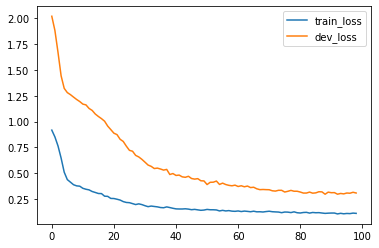

<Figure size 432x288 with 0 Axes>

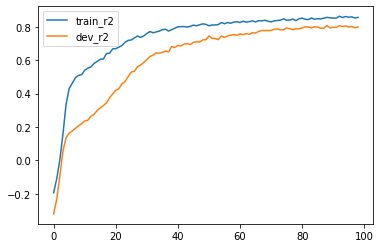

In [3]:
device = 'cuda:0'

train_ds = TensorDataset(seq_x_train, seq_y_train)
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)

test_ds = TensorDataset(seq_x_test, seq_y_test)
test_dl = DataLoader(test_ds, batch_size=32, shuffle=True)

mcdLSTM_regr = MCDLSTM(no_layers=3, input_size=12, hidden_dim=64, output_dim=1, drop_prob=0.5, device=device).to(device)

mse, r2, f1, report = train_mcdlstm(mcdLSTM_regr, train_dl, test_dl, regression=True,
                                    epochs=100, lr=0.00001, patience=10,
                                    save_prefix='models/lstm_model_regr_'+str(int(time.time())),
                                    print_chart=True, print_progress=True, device=device)

print(f'MSE: {mse:.3f}, r2: {r2:.3f}, f1 macro: {f1:.3f}')
print(report)


## Z klasyfikacją, wstępne trenowanie

  1%|          | 1/100 [00:11<18:47, 11.38s/it]

Epoch 1
Train loss : 1.4074045174677852, dev loss : 1.3622623951204362
Dev MSE (rounded outs) : 2.128, R2: 0.111, f1: 0.277


  2%|▏         | 2/100 [00:21<17:39, 10.81s/it]

Epoch 2
Train loss : 1.296038952269573, dev loss : 1.2191909051710559
Dev MSE (rounded outs) : 2.128, R2: 0.204, f1: 0.277


  3%|▎         | 3/100 [00:32<17:05, 10.57s/it]

Epoch 3
Train loss : 1.0358110687478257, dev loss : 0.954725040543464
Dev MSE (rounded outs) : 2.128, R2: 0.377, f1: 0.277


  4%|▍         | 4/100 [00:42<16:46, 10.48s/it]

Epoch 4
Train loss : 0.7569470707135709, dev loss : 0.9037231360712359
Dev MSE (rounded outs) : 2.128, R2: 0.410, f1: 0.277


  5%|▌         | 5/100 [00:54<17:13, 10.88s/it]

Epoch 5
Train loss : 0.6820017828536128, dev loss : 0.9029486371624854
Dev MSE (rounded outs) : 2.128, R2: 0.410, f1: 0.277


  6%|▌         | 6/100 [01:04<16:57, 10.82s/it]

Epoch 6
Train loss : 0.6514502994038842, dev loss : 0.8822879800873418
Dev MSE (rounded outs) : 2.128, R2: 0.424, f1: 0.277


  7%|▋         | 7/100 [01:15<16:31, 10.66s/it]

Epoch 7
Train loss : 0.6095422021013946, dev loss : 0.8573334438185538
Dev MSE (rounded outs) : 2.128, R2: 0.440, f1: 0.277


  8%|▊         | 8/100 [01:25<16:10, 10.55s/it]

Epoch 8
Train loss : 0.5749846838208527, dev loss : 0.8429235816001892
Dev MSE (rounded outs) : 2.128, R2: 0.450, f1: 0.277


  9%|▉         | 9/100 [01:36<16:15, 10.71s/it]

Epoch 9
Train loss : 0.5483006421520776, dev loss : 0.838176978211249
Dev MSE (rounded outs) : 2.128, R2: 0.453, f1: 0.277


 10%|█         | 10/100 [01:46<15:59, 10.66s/it]

Epoch 10
Train loss : 0.5323560949959774, dev loss : 0.8419422920673124
Dev MSE (rounded outs) : 2.128, R2: 0.450, f1: 0.277


 11%|█         | 11/100 [01:59<16:32, 11.15s/it]

Epoch 11
Train loss : 0.5225164065130143, dev loss : 0.8402168356603191
Dev MSE (rounded outs) : 2.128, R2: 0.451, f1: 0.277


 12%|█▏        | 12/100 [02:09<15:59, 10.91s/it]

Epoch 12
Train loss : 0.5111310049125799, dev loss : 0.8437475792823299
Dev MSE (rounded outs) : 2.128, R2: 0.449, f1: 0.277


 13%|█▎        | 13/100 [02:21<16:13, 11.18s/it]

Epoch 13
Train loss : 0.5062105617386551, dev loss : 0.8401200415626648
Dev MSE (rounded outs) : 2.128, R2: 0.451, f1: 0.277


 14%|█▍        | 14/100 [02:31<15:37, 10.90s/it]

Epoch 14
Train loss : 0.49729023066905176, dev loss : 0.8356044869269094
Dev MSE (rounded outs) : 2.128, R2: 0.454, f1: 0.277


 15%|█▌        | 15/100 [02:41<15:11, 10.72s/it]

Epoch 15
Train loss : 0.49331755629876856, dev loss : 0.8306383509789744
Dev MSE (rounded outs) : 2.128, R2: 0.458, f1: 0.277


 16%|█▌        | 16/100 [02:53<15:09, 10.83s/it]

Epoch 16
Train loss : 0.48825227030416724, dev loss : 0.8260926911907811
Dev MSE (rounded outs) : 2.128, R2: 0.461, f1: 0.277


 17%|█▋        | 17/100 [03:03<14:48, 10.71s/it]

Epoch 17
Train loss : 0.4802446403051082, dev loss : 0.8099991852237333
Dev MSE (rounded outs) : 2.128, R2: 0.471, f1: 0.277


 18%|█▊        | 18/100 [03:13<14:27, 10.58s/it]

Epoch 18
Train loss : 0.47271816338239453, dev loss : 0.8033562206452892
Dev MSE (rounded outs) : 2.128, R2: 0.475, f1: 0.277


 19%|█▉        | 19/100 [03:24<14:11, 10.52s/it]

Epoch 19
Train loss : 0.46667400547284854, dev loss : 0.7953826958133329
Dev MSE (rounded outs) : 2.128, R2: 0.481, f1: 0.277


 20%|██        | 20/100 [03:34<14:00, 10.51s/it]

Epoch 20
Train loss : 0.46076314510564087, dev loss : 0.7785838342482044
Dev MSE (rounded outs) : 2.128, R2: 0.492, f1: 0.277


 21%|██        | 21/100 [03:45<13:48, 10.49s/it]

Epoch 21
Train loss : 0.4527604353757715, dev loss : 0.7617880423222819
Dev MSE (rounded outs) : 2.079, R2: 0.503, f1: 0.278


 22%|██▏       | 22/100 [03:55<13:35, 10.45s/it]

Epoch 22
Train loss : 0.4432093866846778, dev loss : 0.7479292952245281
Dev MSE (rounded outs) : 1.812, R2: 0.512, f1: 0.284


 23%|██▎       | 23/100 [04:05<13:21, 10.41s/it]

Epoch 23
Train loss : 0.43270828336359485, dev loss : 0.7360942815580676
Dev MSE (rounded outs) : 1.350, R2: 0.519, f1: 0.363


 24%|██▍       | 24/100 [04:15<13:06, 10.35s/it]

Epoch 24
Train loss : 0.43192085988907947, dev loss : 0.7293155952807395
Dev MSE (rounded outs) : 0.868, R2: 0.524, f1: 0.630


 25%|██▌       | 25/100 [04:26<12:52, 10.30s/it]

Epoch 25
Train loss : 0.42454121662340616, dev loss : 0.7049214541912079
Dev MSE (rounded outs) : 0.998, R2: 0.540, f1: 0.490


 26%|██▌       | 26/100 [04:39<13:51, 11.24s/it]

Epoch 26
Train loss : 0.4167918027507458, dev loss : 0.6953495962004508
Dev MSE (rounded outs) : 0.895, R2: 0.546, f1: 0.588


 27%|██▋       | 27/100 [04:50<13:35, 11.18s/it]

Epoch 27
Train loss : 0.41415592200553464, dev loss : 0.6730050185034352
Dev MSE (rounded outs) : 0.823, R2: 0.561, f1: 0.630


 28%|██▊       | 28/100 [05:00<13:05, 10.91s/it]

Epoch 28
Train loss : 0.41191595674974646, dev loss : 0.6673810313786229
Dev MSE (rounded outs) : 0.721, R2: 0.564, f1: 0.669


 29%|██▉       | 29/100 [05:11<12:55, 10.92s/it]

Epoch 29
Train loss : 0.3996502699352536, dev loss : 0.6658406094197304
Dev MSE (rounded outs) : 0.610, R2: 0.565, f1: 0.714


 30%|███       | 30/100 [05:22<12:45, 10.94s/it]

Epoch 30
Train loss : 0.4003834487656831, dev loss : 0.6597462911759654
Dev MSE (rounded outs) : 0.612, R2: 0.569, f1: 0.716


 31%|███       | 31/100 [05:33<12:21, 10.74s/it]

Epoch 31
Train loss : 0.3923661172272188, dev loss : 0.6364251125243402
Dev MSE (rounded outs) : 0.611, R2: 0.584, f1: 0.722


 32%|███▏      | 32/100 [05:43<12:00, 10.59s/it]

Epoch 32
Train loss : 0.3883725304318511, dev loss : 0.6378748378446025
Dev MSE (rounded outs) : 0.608, R2: 0.584, f1: 0.715


 33%|███▎      | 33/100 [05:54<11:59, 10.74s/it]

Epoch 33
Train loss : 0.3860946830376806, dev loss : 0.6187100564279864
Dev MSE (rounded outs) : 0.589, R2: 0.596, f1: 0.740


 34%|███▍      | 34/100 [06:04<11:40, 10.62s/it]

Epoch 34
Train loss : 0.38839708144956897, dev loss : 0.6224109506414782
Dev MSE (rounded outs) : 0.604, R2: 0.594, f1: 0.725


 35%|███▌      | 35/100 [06:15<11:38, 10.74s/it]

Epoch 35
Train loss : 0.378363708262387, dev loss : 0.6214991630085053
Dev MSE (rounded outs) : 0.603, R2: 0.594, f1: 0.714


 36%|███▌      | 36/100 [06:26<11:33, 10.84s/it]

Epoch 36
Train loss : 0.3718066127462821, dev loss : 0.6069173476388378
Dev MSE (rounded outs) : 0.596, R2: 0.604, f1: 0.724


 37%|███▋      | 37/100 [06:37<11:27, 10.92s/it]

Epoch 37
Train loss : 0.37215639397560846, dev loss : 0.6218641659905834
Dev MSE (rounded outs) : 0.597, R2: 0.594, f1: 0.723


 38%|███▊      | 38/100 [06:48<11:05, 10.73s/it]

Epoch 38
Train loss : 0.36756396546900977, dev loss : 0.5993483032911054
Dev MSE (rounded outs) : 0.599, R2: 0.609, f1: 0.722


 39%|███▉      | 39/100 [06:59<11:01, 10.84s/it]

Epoch 39
Train loss : 0.36769296661785, dev loss : 0.6021167957975019
Dev MSE (rounded outs) : 0.596, R2: 0.607, f1: 0.726


 40%|████      | 40/100 [07:09<10:42, 10.72s/it]

Epoch 40
Train loss : 0.361913460928932, dev loss : 0.6089826976099322
Dev MSE (rounded outs) : 0.593, R2: 0.602, f1: 0.714


 41%|████      | 41/100 [07:20<10:40, 10.85s/it]

Epoch 41
Train loss : 0.3681930501470453, dev loss : 0.5984038725014655
Dev MSE (rounded outs) : 0.594, R2: 0.609, f1: 0.718


 42%|████▏     | 42/100 [07:31<10:20, 10.69s/it]

Epoch 42
Train loss : 0.35596679357200744, dev loss : 0.5969397714061122
Dev MSE (rounded outs) : 0.599, R2: 0.610, f1: 0.712


 43%|████▎     | 43/100 [07:43<10:35, 11.15s/it]

Epoch 43
Train loss : 0.3567095860956686, dev loss : 0.6045555573317313
Dev MSE (rounded outs) : 0.605, R2: 0.605, f1: 0.704


 44%|████▍     | 44/100 [07:57<11:11, 11.99s/it]

Epoch 44
Train loss : 0.3531373637643727, dev loss : 0.6013563837735884
Dev MSE (rounded outs) : 0.604, R2: 0.607, f1: 0.703


 45%|████▌     | 45/100 [08:10<11:10, 12.19s/it]

Epoch 45
Train loss : 0.3585199136507841, dev loss : 0.6013483462795135
Dev MSE (rounded outs) : 0.611, R2: 0.607, f1: 0.698


 46%|████▌     | 46/100 [08:22<10:57, 12.17s/it]

Epoch 46
Train loss : 0.35474955031405325, dev loss : 0.5820075023558832
Dev MSE (rounded outs) : 0.598, R2: 0.620, f1: 0.714


 47%|████▋     | 47/100 [08:32<10:15, 11.62s/it]

Epoch 47
Train loss : 0.3471523743019745, dev loss : 0.5956922252812693
Dev MSE (rounded outs) : 0.602, R2: 0.611, f1: 0.700


 48%|████▊     | 48/100 [08:43<09:56, 11.47s/it]

Epoch 48
Train loss : 0.34834373960264114, dev loss : 0.5748557539716843
Dev MSE (rounded outs) : 0.597, R2: 0.625, f1: 0.706


 49%|████▉     | 49/100 [08:56<10:03, 11.84s/it]

Epoch 49
Train loss : 0.34464698479227396, dev loss : 0.5911035037809803
Dev MSE (rounded outs) : 0.600, R2: 0.614, f1: 0.711


 50%|█████     | 50/100 [09:06<09:28, 11.37s/it]

Epoch 50
Train loss : 0.34227095099659305, dev loss : 0.5930460326133236
Dev MSE (rounded outs) : 0.602, R2: 0.613, f1: 0.700


 51%|█████     | 51/100 [09:17<09:12, 11.28s/it]

Epoch 51
Train loss : 0.3374245060173419, dev loss : 0.5951481673025316
Dev MSE (rounded outs) : 0.598, R2: 0.611, f1: 0.701


 52%|█████▏    | 52/100 [09:28<08:58, 11.22s/it]

Epoch 52
Train loss : 0.3355831828689858, dev loss : 0.5759141036579686
Dev MSE (rounded outs) : 0.593, R2: 0.624, f1: 0.702


 53%|█████▎    | 53/100 [09:41<09:12, 11.76s/it]

Epoch 53
Train loss : 0.34020195082713495, dev loss : 0.5841067279538801
Dev MSE (rounded outs) : 0.598, R2: 0.619, f1: 0.700


 54%|█████▍    | 54/100 [09:52<08:49, 11.51s/it]

Epoch 54
Train loss : 0.33616017538450454, dev loss : 0.5626795090013935
Dev MSE (rounded outs) : 0.587, R2: 0.633, f1: 0.707


 55%|█████▌    | 55/100 [10:05<08:50, 11.79s/it]

Epoch 55
Train loss : 0.33828068224219937, dev loss : 0.5757853566638885
Dev MSE (rounded outs) : 0.596, R2: 0.624, f1: 0.694


 56%|█████▌    | 56/100 [10:18<08:59, 12.26s/it]

Epoch 56
Train loss : 0.32968338908767514, dev loss : 0.577160810270617
Dev MSE (rounded outs) : 0.591, R2: 0.623, f1: 0.698


 57%|█████▋    | 57/100 [10:29<08:32, 11.92s/it]

Epoch 57
Train loss : 0.33026536215435376, dev loss : 0.5614937803437633
Dev MSE (rounded outs) : 0.589, R2: 0.633, f1: 0.702


 58%|█████▊    | 58/100 [10:40<08:00, 11.45s/it]

Epoch 58
Train loss : 0.32868179107607587, dev loss : 0.564196232826479
Dev MSE (rounded outs) : 0.585, R2: 0.632, f1: 0.708


 59%|█████▉    | 59/100 [10:50<07:36, 11.14s/it]

Epoch 59
Train loss : 0.3236298891365999, dev loss : 0.5797849682069594
Dev MSE (rounded outs) : 0.593, R2: 0.621, f1: 0.693


 60%|██████    | 60/100 [11:00<07:16, 10.90s/it]

Epoch 60
Train loss : 0.32965008331381757, dev loss : 0.5481220108847464
Dev MSE (rounded outs) : 0.586, R2: 0.642, f1: 0.703


 61%|██████    | 61/100 [11:11<07:08, 10.98s/it]

Epoch 61
Train loss : 0.3269057047696924, dev loss : 0.5620787167741407
Dev MSE (rounded outs) : 0.584, R2: 0.633, f1: 0.695


 62%|██████▏   | 62/100 [11:22<06:51, 10.82s/it]

Epoch 62
Train loss : 0.3237116473465569, dev loss : 0.5488801877344808
Dev MSE (rounded outs) : 0.588, R2: 0.642, f1: 0.697


 63%|██████▎   | 63/100 [11:33<06:46, 10.98s/it]

Epoch 63
Train loss : 0.32279551285411057, dev loss : 0.5508233577974381
Dev MSE (rounded outs) : 0.584, R2: 0.640, f1: 0.695


 64%|██████▍   | 64/100 [11:44<06:37, 11.05s/it]

Epoch 64
Train loss : 0.3136707550069325, dev loss : 0.5552838040936378
Dev MSE (rounded outs) : 0.595, R2: 0.637, f1: 0.683


 65%|██████▌   | 65/100 [11:55<06:19, 10.84s/it]

Epoch 65
Train loss : 0.3191358124020071, dev loss : 0.5457344329164874
Dev MSE (rounded outs) : 0.588, R2: 0.644, f1: 0.678


 66%|██████▌   | 66/100 [12:05<06:03, 10.70s/it]

Epoch 66
Train loss : 0.31573745916071144, dev loss : 0.5673898343117006
Dev MSE (rounded outs) : 0.574, R2: 0.630, f1: 0.698


 67%|██████▋   | 67/100 [12:20<06:29, 11.79s/it]

Epoch 67
Train loss : 0.3118886245421977, dev loss : 0.5662661526472338
Dev MSE (rounded outs) : 0.584, R2: 0.630, f1: 0.686


 68%|██████▊   | 68/100 [12:30<06:04, 11.38s/it]

Epoch 68
Train loss : 0.3153820756690304, dev loss : 0.5436596139784782
Dev MSE (rounded outs) : 0.592, R2: 0.645, f1: 0.670


 69%|██████▉   | 69/100 [12:41<05:50, 11.32s/it]

Epoch 69
Train loss : 0.3136373972998777, dev loss : 0.5536709432640383
Dev MSE (rounded outs) : 0.581, R2: 0.639, f1: 0.511


 70%|███████   | 70/100 [12:55<05:59, 11.99s/it]

Epoch 70
Train loss : 0.30921128819229105, dev loss : 0.5425186474477092
Dev MSE (rounded outs) : 0.593, R2: 0.646, f1: 0.526


 71%|███████   | 71/100 [13:08<06:01, 12.45s/it]

Epoch 71
Train loss : 0.3111147598138911, dev loss : 0.518524516974726
Dev MSE (rounded outs) : 0.592, R2: 0.661, f1: 0.508


 72%|███████▏  | 72/100 [13:19<05:32, 11.86s/it]

Epoch 72
Train loss : 0.30458909358549496, dev loss : 0.531921271835604
Dev MSE (rounded outs) : 0.580, R2: 0.653, f1: 0.500


 73%|███████▎  | 73/100 [13:29<05:08, 11.43s/it]

Epoch 73
Train loss : 0.306936259915235, dev loss : 0.5201935691218222
Dev MSE (rounded outs) : 0.579, R2: 0.660, f1: 0.499


 74%|███████▍  | 74/100 [13:40<04:54, 11.34s/it]

Epoch 74
Train loss : 0.3016630418510305, dev loss : 0.529314152656063
Dev MSE (rounded outs) : 0.576, R2: 0.654, f1: 0.500


 75%|███████▌  | 75/100 [13:51<04:37, 11.09s/it]

Epoch 75
Train loss : 0.2965656229747614, dev loss : 0.5228883585622234
Dev MSE (rounded outs) : 0.574, R2: 0.659, f1: 0.496


 76%|███████▌  | 76/100 [14:02<04:27, 11.15s/it]

Epoch 76
Train loss : 0.30304056438414945, dev loss : 0.5385792942777756
Dev MSE (rounded outs) : 0.575, R2: 0.648, f1: 0.503


 77%|███████▋  | 77/100 [14:13<04:16, 11.15s/it]

Epoch 77
Train loss : 0.2969247399288204, dev loss : 0.5527594767270549
Dev MSE (rounded outs) : 0.571, R2: 0.639, f1: 0.504


 78%|███████▊  | 78/100 [14:24<04:05, 11.14s/it]

Epoch 78
Train loss : 0.29362606959557347, dev loss : 0.5290581487840221
Dev MSE (rounded outs) : 0.569, R2: 0.655, f1: 0.499


 79%|███████▉  | 79/100 [14:36<03:59, 11.39s/it]

Epoch 79
Train loss : 0.2933320469800898, dev loss : 0.5269943355552612
Dev MSE (rounded outs) : 0.558, R2: 0.656, f1: 0.493


 80%|████████  | 80/100 [14:47<03:41, 11.08s/it]

Epoch 80
Train loss : 0.2853266382553125, dev loss : 0.5156477617640649
Dev MSE (rounded outs) : 0.544, R2: 0.663, f1: 0.491


 81%|████████  | 81/100 [14:57<03:26, 10.88s/it]

Epoch 81
Train loss : 0.29180860104179196, dev loss : 0.5458690394316951
Dev MSE (rounded outs) : 0.561, R2: 0.644, f1: 0.489


 82%|████████▏ | 82/100 [15:07<03:12, 10.71s/it]

Epoch 82
Train loss : 0.29427726083829, dev loss : 0.5390049637325348
Dev MSE (rounded outs) : 0.553, R2: 0.648, f1: 0.485


 83%|████████▎ | 83/100 [15:22<03:20, 11.80s/it]

Epoch 83
Train loss : 0.2876167989118768, dev loss : 0.530524137520021
Dev MSE (rounded outs) : 0.557, R2: 0.654, f1: 0.490


 84%|████████▍ | 84/100 [15:33<03:05, 11.62s/it]

Epoch 84
Train loss : 0.2869373185361327, dev loss : 0.553903944550022
Dev MSE (rounded outs) : 0.547, R2: 0.638, f1: 0.478


 85%|████████▌ | 85/100 [15:44<02:49, 11.32s/it]

Epoch 85
Train loss : 0.2851353123077291, dev loss : 0.5534396349422394
Dev MSE (rounded outs) : 0.545, R2: 0.639, f1: 0.486


 86%|████████▌ | 86/100 [15:56<02:44, 11.76s/it]

Epoch 86
Train loss : 0.28332065278480173, dev loss : 0.5407721145499137
Dev MSE (rounded outs) : 0.549, R2: 0.647, f1: 0.482


 87%|████████▋ | 87/100 [16:07<02:27, 11.34s/it]

Epoch 87
Train loss : 0.28361543531533284, dev loss : 0.5439877010160877
Dev MSE (rounded outs) : 0.550, R2: 0.645, f1: 0.462


 88%|████████▊ | 88/100 [16:18<02:15, 11.29s/it]

Epoch 88
Train loss : 0.28438171264328976, dev loss : 0.5332271120240611
Dev MSE (rounded outs) : 0.548, R2: 0.652, f1: 0.483


 89%|████████▉ | 89/100 [16:28<02:01, 11.02s/it]

Epoch 89
Train loss : 0.27675717215057416, dev loss : 0.5758715464222816
Dev MSE (rounded outs) : 0.557, R2: 0.624, f1: 0.452


 89%|████████▉ | 89/100 [16:39<02:03, 11.23s/it]

Epoch 90
Train loss : 0.278838271348785, dev loss : 0.5823398939063472
Dev MSE (rounded outs) : 0.560, R2: 0.620, f1: 0.453
Early stop.
Best dev loss: 0.5156477617640649
MSE: 0.544, r2: 0.663, f1 macro: 0.491
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       702
         1.0       0.00      0.00      0.00         0
         2.0       0.40      0.59      0.48        93
         3.0       0.68      0.43      0.53       192

    accuracy                           0.83       987
   macro avg       0.51      0.50      0.49       987
weighted avg       0.85      0.83      0.83       987



<Figure size 432x288 with 0 Axes>

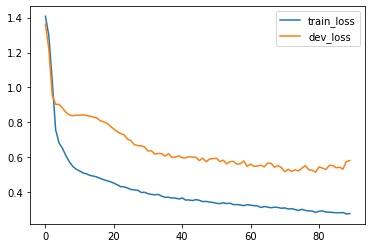

<Figure size 432x288 with 0 Axes>

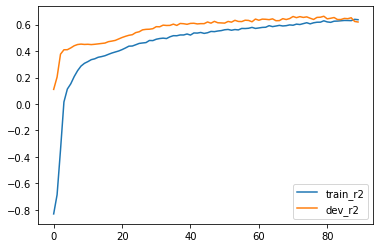

In [11]:
device = 'cuda:0'

train_ds = TensorDataset(seq_x_train, seq_y_train)
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)

test_ds = TensorDataset(seq_x_test, seq_y_test)
test_dl = DataLoader(test_ds, batch_size=32, shuffle=True)

mcdLSTM_clf = MCDLSTM(no_layers=3, input_size=12, hidden_dim=64, output_dim=4, drop_prob=0.5, device=device).to(device)

mse, r2, f1, report = train_mcdlstm(mcdLSTM_clf, train_dl, test_dl, regression=False,
                                    epochs=100, lr=0.00001, patience=10,
                                    save_prefix='models/lstm_model_clf_'+str(int(time.time())),
                                    print_chart=True, save_chart=True, print_progress=True, device=device)

print(f'MSE: {mse:.3f}, r2: {r2:.3f}, f1 macro: {f1:.3f}')
print(report)

# Niepewności (regresja)

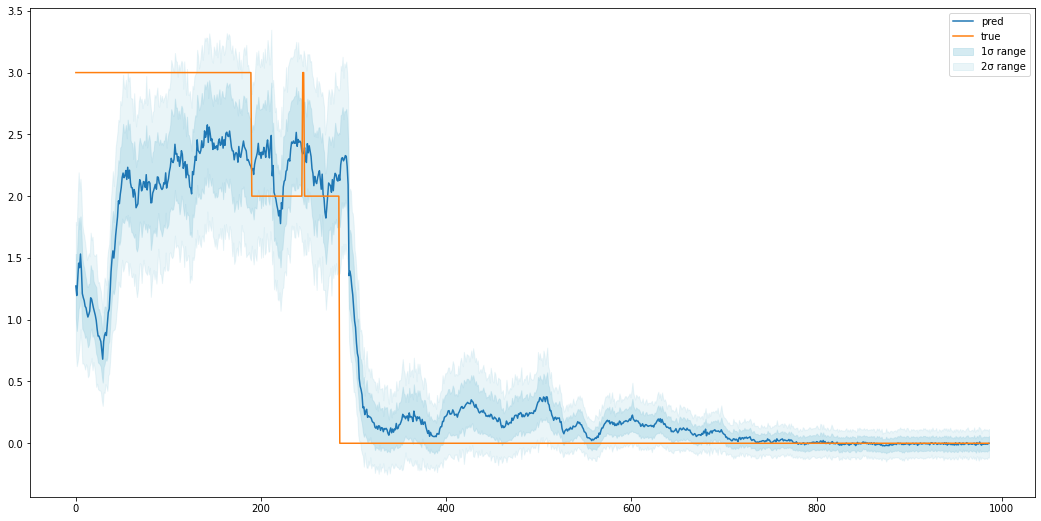

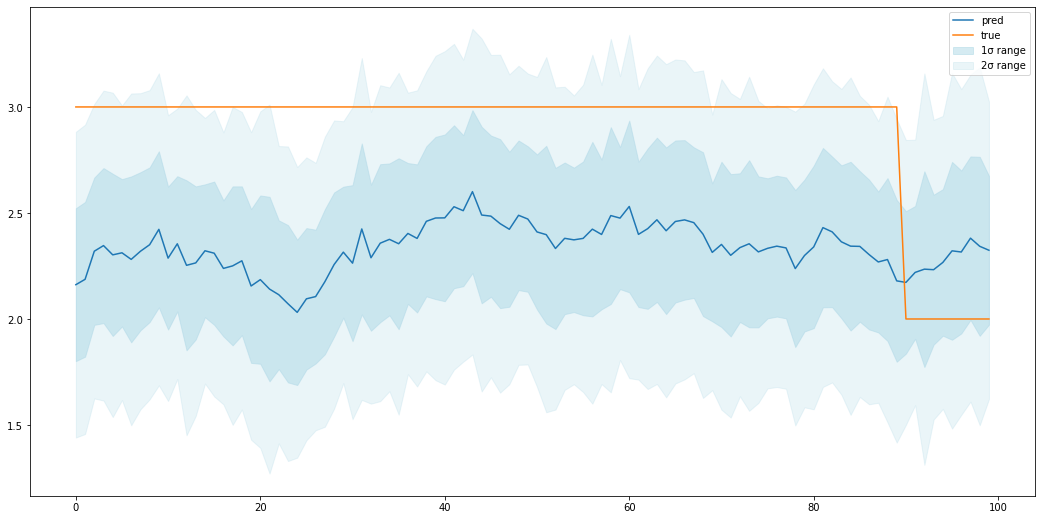

In [13]:
from src.lstm import visualise_regr_results

device='cuda:0'
mcdLSTM_regr = MCDLSTM(no_layers=3, input_size=12, hidden_dim=64, output_dim=1, drop_prob=0.5, device=device).to(device)
best_state = torch.load('models/lstm_model_regr.pt', map_location=device)
mcdLSTM_regr.load_state_dict(best_state)

plt.figure(figsize=(18, 9))
visualise_regr_results(mcdLSTM_regr, seq_x_test[0:1000], seq_y_test[0:1000], device=device)
plt.figure(figsize=(18, 9))
visualise_regr_results(mcdLSTM_regr, seq_x_test[100:200], seq_y_test[100:200], device=device)

## Prawdopodobieństwa klasy (klasyfikacja)

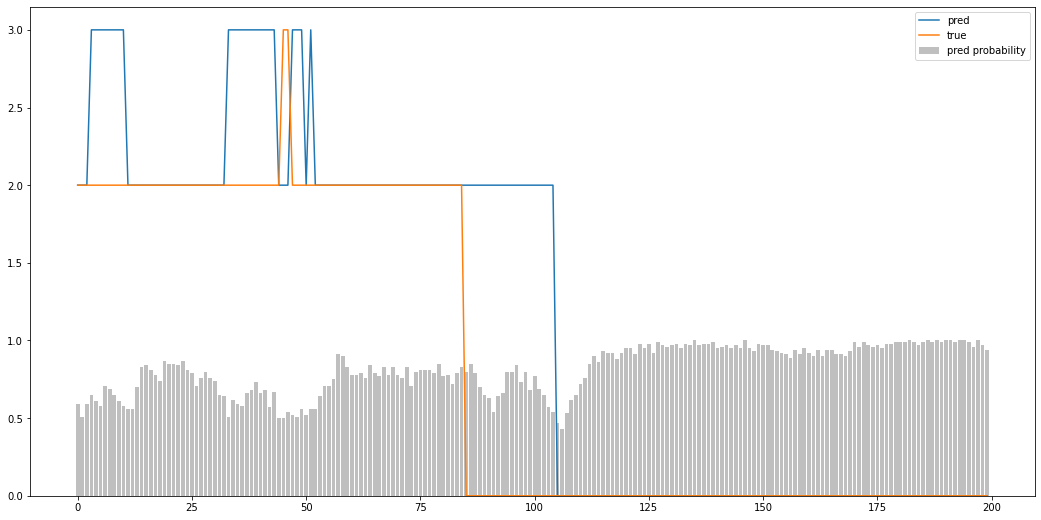

In [14]:
from src.lstm import visualise_clf_results

device='cuda:0'
mcdLSTM_clf = MCDLSTM(no_layers=3, input_size=12, hidden_dim=64, output_dim=4, drop_prob=0.5, device=device).to(device)
best_state = torch.load('models/lstm_model_clf.pt', map_location=device)
mcdLSTM_clf.load_state_dict(best_state)

plt.figure(figsize=(18, 9))
visualise_clf_results(mcdLSTM_clf, seq_x_test[200:400], seq_y_test[200:400], device=device)

## Hiperparametry

 45%|████▌     | 136/300 [03:57<04:46,  1.75s/it]

Early stop.
Best dev loss: 1.237116363313463
MSE: 1.657, r2: -0.293, f1 macro: 0.356
              precision    recall  f1-score   support

         0.0       0.88      0.54      0.67      1816
         1.0       0.00      0.00      0.00       123
         2.0       0.00      0.00      0.00       121
         3.0       0.63      0.94      0.76       230

    accuracy                           0.52      2290
   macro avg       0.38      0.37      0.36      2290
weighted avg       0.76      0.52      0.61      2290




  5%|▌         | 16/300 [01:06<19:33,  4.13s/it]

Early stop.
Best dev loss: 1.3947350795452411
MSE: 1.783, r2: -0.938, f1 macro: 0.171
              precision    recall  f1-score   support

         0.0       0.34      1.00      0.51       143
         1.0       0.00      0.00      0.00       116
         2.0       0.00      0.00      0.00       156

    accuracy                           0.34       415
   macro avg       0.11      0.33      0.17       415
weighted avg       0.12      0.34      0.18       415




 65%|██████▌   | 196/300 [24:56<13:13,  7.63s/it]

Early stop.
Best dev loss: 0.11230862583654622
MSE: 0.065, r2: 0.739, f1 macro: 0.671
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      4280
         1.0       0.74      0.64      0.68       138
         2.0       0.58      0.76      0.66       242
         3.0       0.40      0.30      0.34       130

    accuracy                           0.95      4790
   macro avg       0.68      0.67      0.67      4790
weighted avg       0.95      0.95      0.95      4790




 16%|█▋        | 49/300 [09:45<49:57, 11.94s/it]

Early stop.
Best dev loss: 0.3508489316000658
MSE: 0.296, r2: 0.765, f1 macro: 0.370
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       777
         1.0       0.00      0.00      0.00         0
         2.0       0.32      1.00      0.49        93
         3.0       0.00      0.00      0.00       201

    accuracy                           0.80      1071
   macro avg       0.33      0.50      0.37      1071
weighted avg       0.75      0.80      0.76      1071

[tensor(1.6572), tensor(1.7831), tensor(0.0647), tensor(0.2960)]
[0.3561453442473096, 0.17084826762246116, 0.6707339252286719, 0.3699475043321668]
Avg mse: 0.9502602219581604, f1: 0.39191876035765233


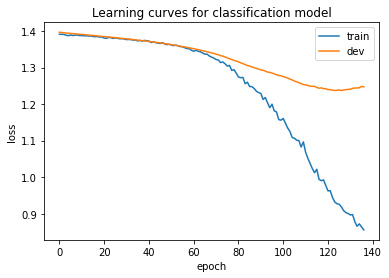

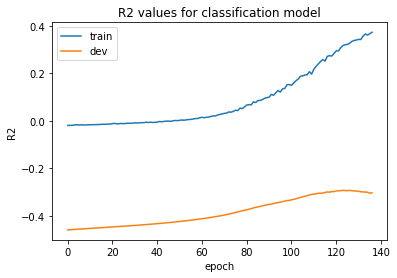

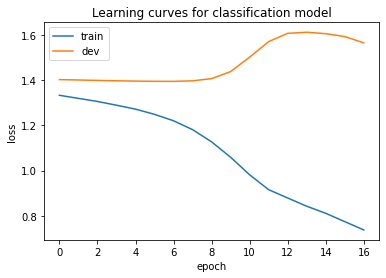

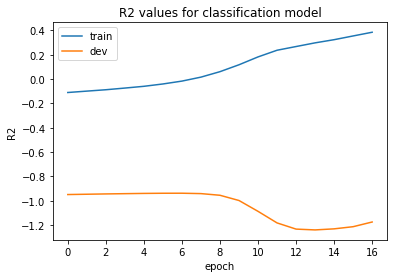

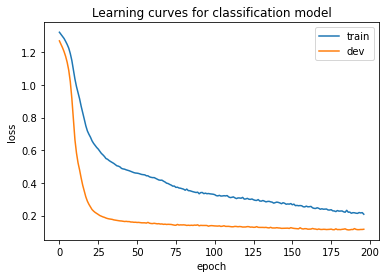

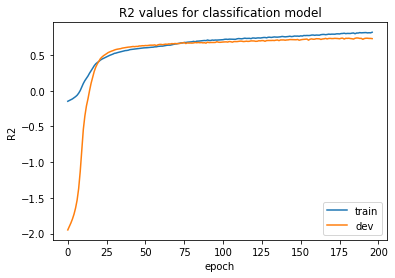

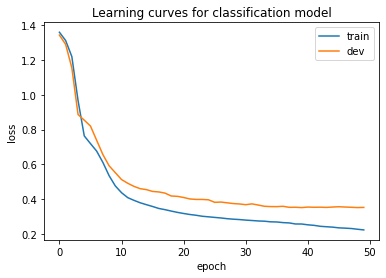

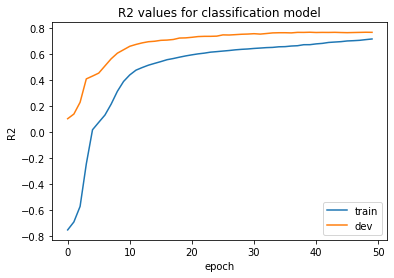

In [2]:
splitted_series = time_series_split(df)
evaluate_hparams(splitted_series, epochs=300)

In [ ]:
import pickle

torch.manual_seed(11)
np.random.seed(11)

splitted_series = time_series_split(df)

epochs=200
patience=10
param_grid_1 = {'sequence_length': [5, 10, 15], 'no_layers': [2, 3, 4], 'hidden_dim': [16,32,64], 'regression': [True, False],
                'drop_prob': [0.5], 'lr': [0.00001]}

param_grid_2 = {'drop_prob': [0.1, 0.25, 0.5], 'lr': [0.00001, 0.00005, 0.0001]}

param_grid = ParameterGrid(param_grid_1)
outs = []
for params in tqdm(param_grid):
    mse_vals, f1_vals, save_prefix = evaluate_hparams(splitted_series, silent=True, epochs=300, **params)
    params['mse_vals'] = mse_vals
    params['mse_mean'] = np.mean(mse_vals)
    params['mse_std'] = np.std(mse_vals)
    params['f1_vals'] = f1_vals
    params['f1_mean'] = np.mean(f1_vals)
    params['f1_std'] = np.std(f1_vals)
    params['save_prefix'] = save_prefix
    outs.append(params)
    res_df = pd.DataFrame.from_records(outs)
    with open('hp_tuning_df.pkl', 'wb') as f:
        pickle.dump(obj=res_df, file=f)


  0%|          | 0/54 [00:00<?, ?it/s]